In [1]:
import os, glob
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np
from pathlib import PurePath
import fitsio
import glymur
import sunpy.visualization.colormaps as cm
import matplotlib.patches as patches
import matplotlib.colors as colors
plt.style.use('dark_background')

In [2]:
# HMI
hmif = sorted(glob.glob(PurePath(os.environ['DATA'], 'SDO/Nvidia/2017_09_01/continuum/hmi*.fits').as_posix()))

# Zoom in on a tracked region around the sunspot of AR12673
hmif2 = sorted(glob.glob(PurePath(os.environ['DATA'], 'SDO/HMI/EARs/AR12673_2017_09_01/series_continuum/mtrack*.fits').as_posix()))

In [3]:
Re = 6371/368

In [4]:
61 / 9600 * 4200

26.6875

In [5]:
plt.rcParams.update({'font.size': 16,
                    'xtick.labelsize': 16,
                    'ytick.labelsize':16})
# xtick.labelsize : 16
# ytick.labelsize : 16

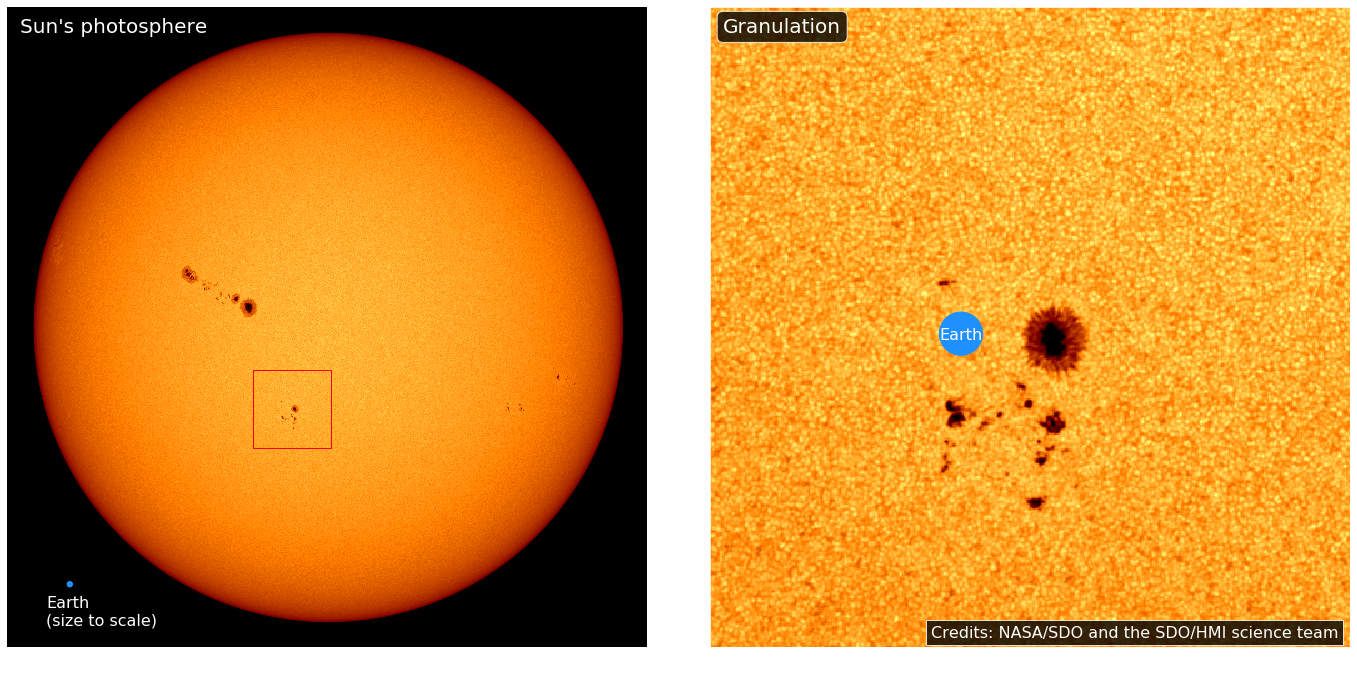

In [6]:
hdul = fits.open(hmif[27])
sample = hdul[1]
sample.verify('silentfix')
hmi = sample.data
h = hdul[1].header
h['CROTA2']
hdul.close()
if h['CROTA2'] > 100: 
    hmi = np.rot90(hmi, 2)
hmi[np.isnan(hmi)] = np.nanpercentile(hmi, 0.01)
hdul.close()

hmi2 = fitsio.read(hmif2[4200])

circle1 = plt.Circle((400, 400), Re, color='dodgerblue')
circle2 = plt.Circle((200, 250), Re, color='dodgerblue')
# Create a Rectangle patch
rect = patches.Rectangle((1575, 1270),500,500,linewidth=1,edgecolor='r',facecolor='none')


%matplotlib inline
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs[0].imshow(hmi, vmin=np.nanpercentile(hmi, 0.01), vmax=1.5*np.nanpercentile(hmi, 99.99), origin='lower', 
              cmap='afmhot', norm=colors.PowerNorm(gamma=1))

axs[0].axis('off')
axs[0].text(0.02, 0.96, 'Sun\'s photosphere', fontsize = 20, transform=axs[0].transAxes)
axs[0].add_artist(circle1)
axs[0].text(250, 140, 'Earth\n(size to scale)', fontsize=16)

# Add the patch to the Axes
axs[0].add_patch(rect)

axs[1].imshow(hmi2, vmin=np.percentile(hmi2, 0.1), vmax=1.14*np.percentile(hmi2, 99.99),
              origin='lower', cmap='afmhot', norm=colors.PowerNorm(gamma=1.3))

axs[1].add_artist(circle2)
axs[1].text(183, 245, 'Earth', fontsize=16)
axs[1].set_xlabel('X [pixels]', fontsize=16)
axs[1].set_ylabel('Y [pixels]', fontsize=16)
for tick in axs[1].xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
        
for tick in axs[1].yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
        
nasa_credits = 'Credits: NASA/SDO and the SDO/HMI science team'
box_props = dict(boxstyle='square', facecolor='black', alpha=0.8)
axs[1].text(0.02, 0.96, 'Granulation', transform=axs[1].transAxes, fontsize=20, color='white',
            bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))
axs[1].text(0.345, 0.015, nasa_credits, transform=axs[1].transAxes, fontsize=16, bbox=box_props, color='white')

plt.tight_layout()
#plt.savefig(PurePath(os.environ['DATA'], 'SDO/Nvidia/2017_09_01/export_images/', 'photosphere_sunspot_granulation.png'), dpi=120)

In [9]:
for i, f in enumerate(hmif[0:1]):
    fpath = PurePath(f)
    with fits.open(f) as hdul:
        hdul = fits.open(f)
        hdul[1].verify('silentfix')
        data = hdul[1].data
        h = hdul[1].header
        if h['CROTA2'] > 170:
            data = np.rot90(data, 2)
    
    data[np.isnan(data)] = np.nanpercentile(data, 0.01)

    fig = plt.figure(figsize=(12,12))
    plt.imshow(data, vmin=np.nanpercentile(data, 0.01), vmax=1.5*np.nanpercentile(data, 99.99), origin='lower', cmap='afmhot')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(PurePath(os.environ['DATA'], 'SDO/Nvidia/2017_09_01/continuum/export_images/', 'continuum_{:03d}.png'.format(i)), dpi=120)
    plt.close()

In [10]:
from datetime import datetime, timedelta
# datetime(year, month, day, hour, minute, second, microsecond)
# b = datetime(2017, 11, 28, 23, 55, 59, 342380)

In [11]:
start_time = datetime(2017, 9, 1, 0, 0, 0)
dt = timedelta(seconds=45)
start_time.strftime('%Y %b %d - %H:%M:%S')

'2017 Sep 01 - 00:00:00'

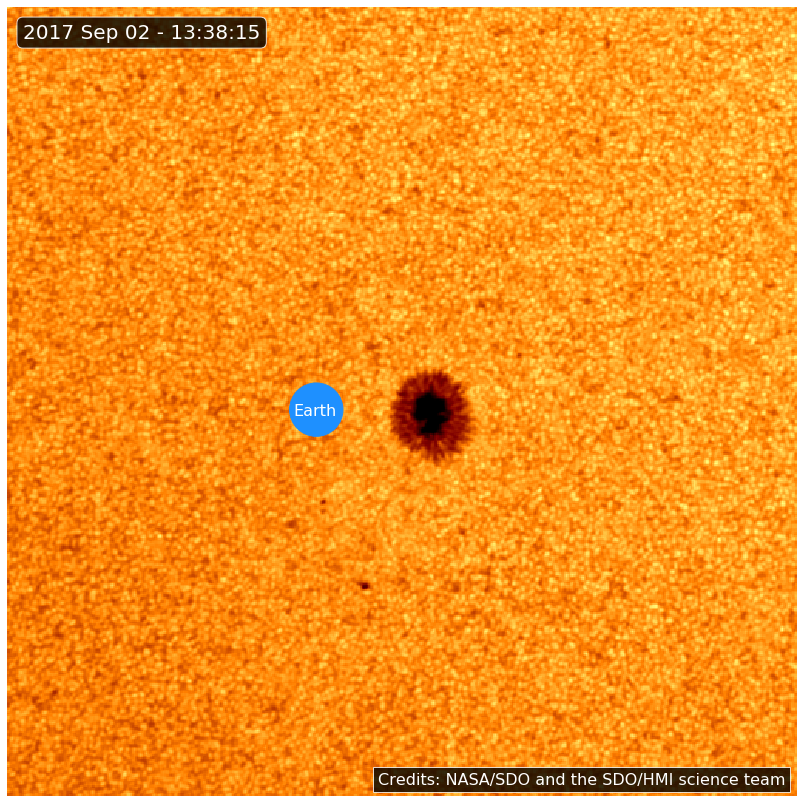

In [21]:
# Sample

nasa_credits = 'Credits: NASA/SDO and the SDO/HMI science team'
box_props = dict(boxstyle='square', facecolor='black', alpha=0.8)
my_dpi = 120


hmi2 = fitsio.read(hmif2[3000])
strtime = (start_time + 3000*dt + i*dt).strftime('%Y %b %d - %H:%M:%S')

fig,ax = plt.subplots(figsize=(12,12))
#     plt.imshow(data, vmin=np.percentile(data, 0.15), vmax=1.22*np.percentile(data, 99.99),
#               origin='lower', cmap='afmhot', norm=colors.PowerNorm(gamma=1.5))

plt.imshow(hmi2, vmin=np.percentile(hmi2, 0.1), vmax=1.14*np.percentile(hmi2, 99.99),
          origin='lower', cmap='afmhot', norm=colors.PowerNorm(gamma=1.5))

plt.text(0.02, 0.96, strtime, transform=ax.transAxes, fontsize=20, color='white',
        bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))

plt.xlabel('X [pixels]', fontsize=16)
plt.ylabel('Y [pixels]', fontsize=16)

circle2 = plt.Circle((200, 250), Re, color='dodgerblue')
ax.add_artist(circle2)
ax.text(185, 246, 'Earth', fontsize=16)

ax.text(0.47, 0.015, nasa_credits, transform=ax.transAxes, fontsize=16, bbox=box_props, color='white')
ax.axis('off')

plt.tight_layout()
plt.savefig(PurePath(os.environ['DATA'], 'SDO/Nvidia/2017_09_01/export_images/continuum_mtrack.png'), dpi=80)


In [18]:
nasa_credits = 'Credits: NASA/SDO and the SDO/HMI science team'
box_props = dict(boxstyle='square', facecolor='black', alpha=0.8)
my_dpi = 120


for i, f in enumerate(hmif2[3000:4200]):
    hmi2 = fitsio.read(f)
    strtime = (start_time + 3000*dt + i*dt).strftime('%Y %b %d - %H:%M:%S')
    
    fig,ax = plt.subplots(figsize=(12,12))
#     plt.imshow(data, vmin=np.percentile(data, 0.15), vmax=1.22*np.percentile(data, 99.99),
#               origin='lower', cmap='afmhot', norm=colors.PowerNorm(gamma=1.5))

    plt.imshow(hmi2, vmin=np.percentile(hmi2, 0.1), vmax=1.14*np.percentile(hmi2, 99.99),
              origin='lower', cmap='afmhot', norm=colors.PowerNorm(gamma=1.5))
    
    plt.text(0.02, 0.96, strtime, transform=ax.transAxes, fontsize=20, color='white',
            bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))
    
    plt.xlabel('X [pixels]', fontsize=16)
    plt.ylabel('Y [pixels]', fontsize=16)
    
    circle2 = plt.Circle((200, 250), Re, color='dodgerblue')
    ax.add_artist(circle2)
    ax.text(185, 246, 'Earth', fontsize=16)
    
    ax.text(0.47, 0.015, nasa_credits, transform=ax.transAxes, fontsize=16, bbox=box_props, color='white')
    ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(PurePath(os.environ['DATA'], 'SDO/Nvidia/2017_09_01/export_images/mtrack', 'continuum_mtrack_{:04d}.png'.format(i)), dpi=80)
    plt.close()

#### # AIA
jpf= sorted(glob.glob(PurePath(os.environ['DATA'], 'SDO/temp/2017_09_01/AIA_171/2017*.jp2').as_posix()))
len(jpf)
jp2 = glymur.Jp2k(jpf[0])
aia = np.flipud(jp2[:])

cm_aia171 = plt.get_cmap('sdoaia171')


(-0.5, 4095.5, -0.5, 4095.5)

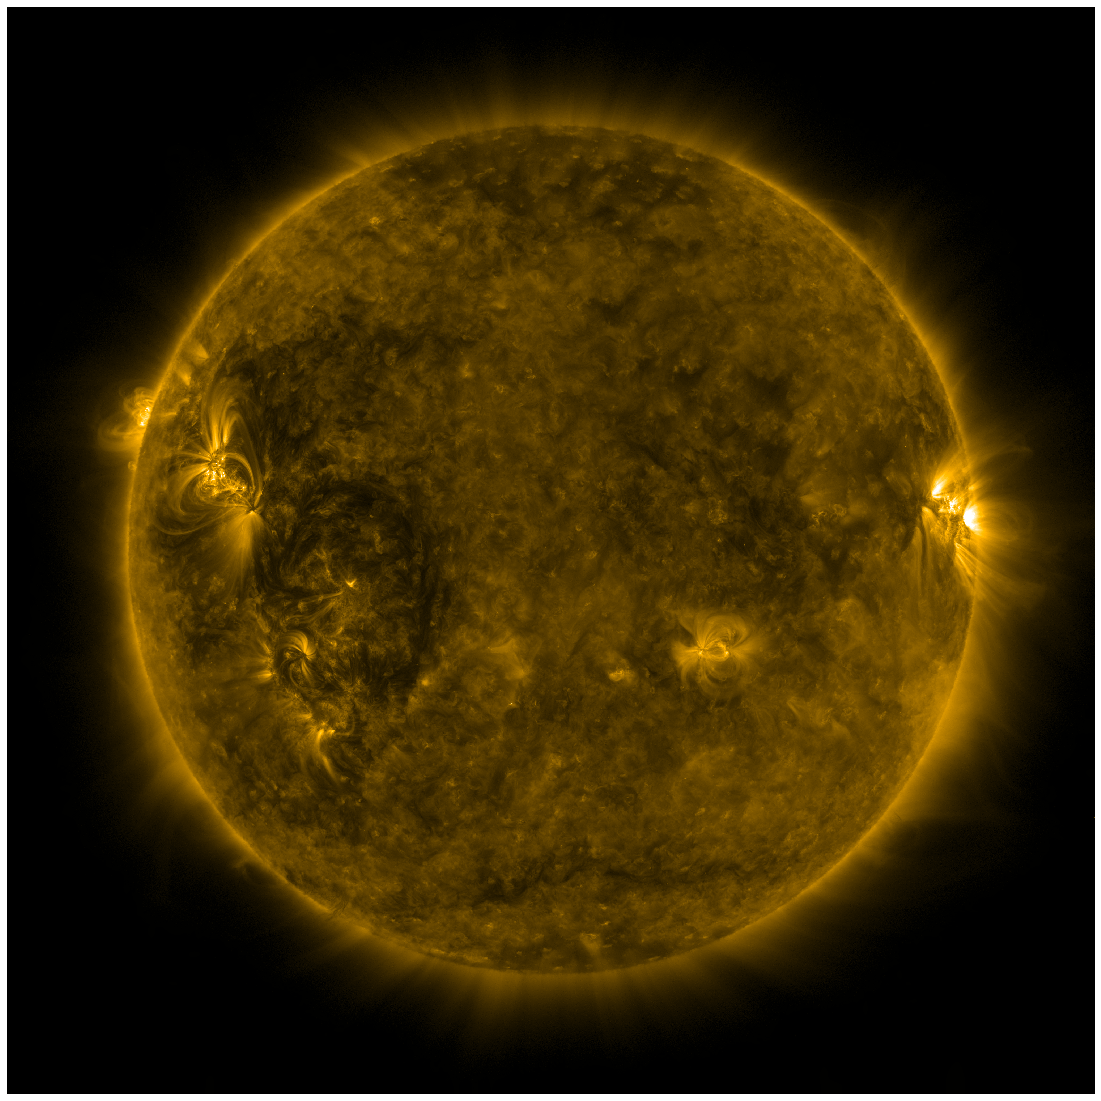

In [4]:


jp2 = glymur.Jp2k(jpf[0])
data = np.flipud(jp2[:])

cm_aia171 = plt.get_cmap('sdoaia171')
fig = plt.figure(figsize=(20, 20))
plt.imshow(data, vmin=0, vmax=np.percentile(data, 99.99), origin='lower', cmap=cm_aia171)
plt.axis('off')

In [134]:
from sunpy.time import parse_time

In [135]:
import numpy as np
from astropy.time import Time
times = ['1999-01-01T00:00:00.123456789', '2010-01-01T00:00:00']
t = Time(times, format='isot', scale='utc')

In [138]:
t = Time('1999-01-01T00:00:00.123456789', format='isot', scale='tai')

In [ ]:
2012.06.22_17:56:15_TAI

In [149]:
import sunpy
from sunpy.time import parse_time
print(sunpy.__version__)
t = parse_time('2012.06.22_17:56:15_TAI')
t.jd

1.1.4


2456101.2473958335

In [144]:
t.jd

2456101.2473958335

In [148]:
import sys
sys.version

'3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]'